# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- Ensemble Learinig (개념, 하드보팅, 소프트보팅)
- ML 데이터 처리 관련 추가정리 (LabelEncoder, Scaler, Validation)

]

## Ensemble Learning


- 개념 : 여러 개의 Classifer를 생성하고, 각 예측을 결합함으로써 보다 정확한 최종 예측(Predict) 을 도출하는 기법

##  앙상블 학습

이론 : https://formal.hknu.ac.kr/handson-ml2/slides/handson-ml2-07-slides.pdf

실습 : https://injo.tistory.com/22

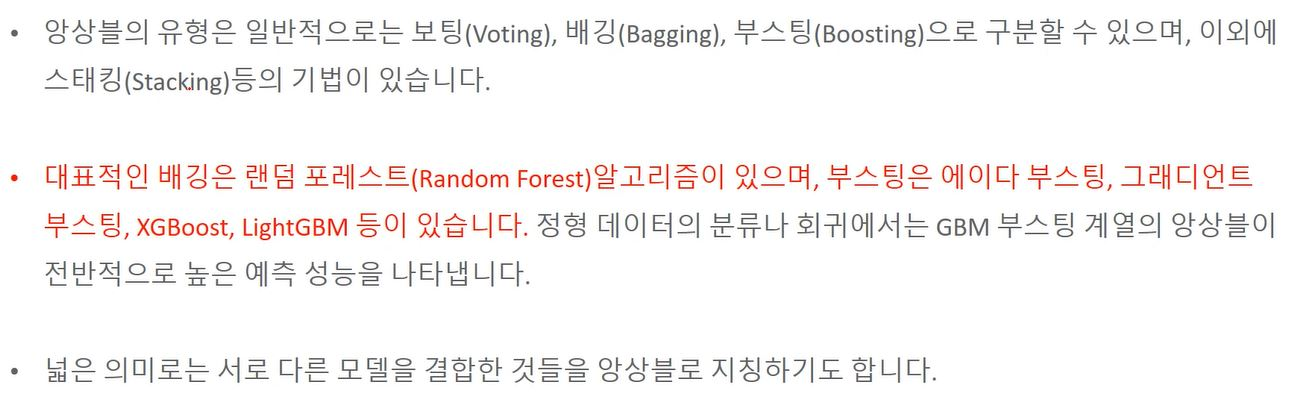

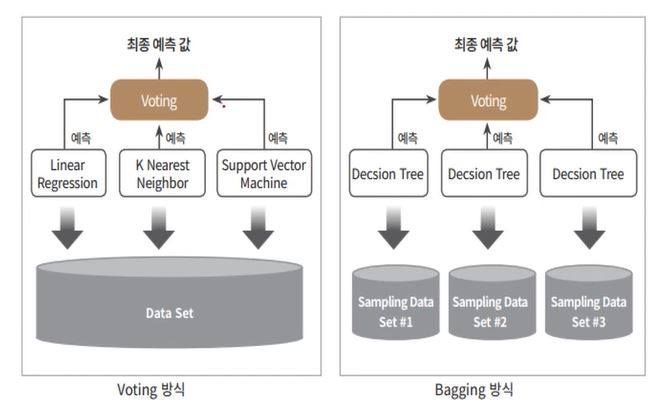

** 추가 : Voting 유형 **

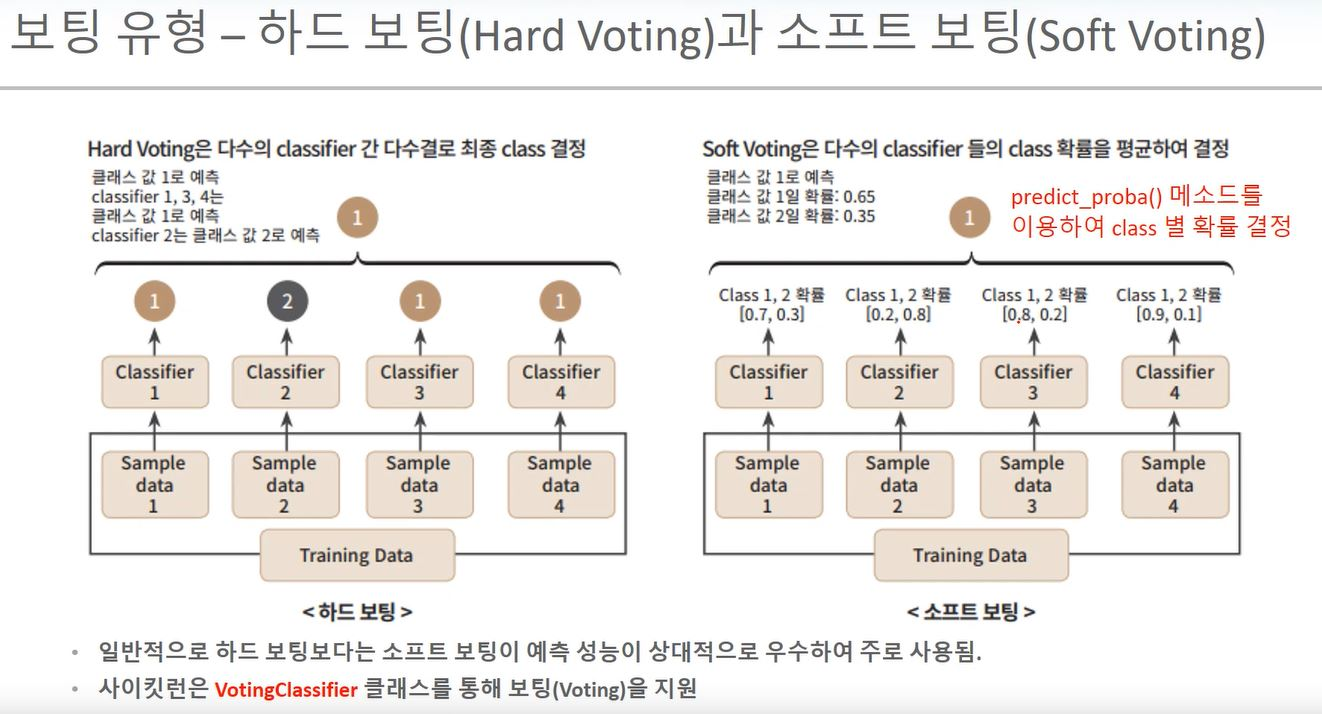

### 예제 : Voting Classifier

**위스콘신 유방암 데이터 로드**

In [11]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [12]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [13]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [14]:
lr_clf

LogisticRegression()

In [15]:
knn_clf

KNeighborsClassifier(n_neighbors=8)

In [16]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

In [18]:
X_train

array([[1.546e+01, 1.189e+01, 1.025e+02, ..., 1.827e-01, 3.216e-01,
        1.010e-01],
       [1.175e+01, 2.018e+01, 7.610e+01, ..., 7.909e-02, 3.168e-01,
        7.987e-02],
       [1.108e+01, 1.471e+01, 7.021e+01, ..., 4.306e-02, 1.902e-01,
        7.313e-02],
       ...,
       [1.245e+01, 1.641e+01, 8.285e+01, ..., 1.342e-01, 3.231e-01,
        1.034e-01],
       [1.270e+01, 1.217e+01, 8.088e+01, ..., 8.224e-02, 2.775e-01,
        9.464e-02],
       [1.016e+01, 1.959e+01, 6.473e+01, ..., 2.232e-02, 2.262e-01,
        6.742e-02]])

In [19]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [20]:
# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [21]:
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474


In [22]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


### ** Bagging**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [24]:
dt_clf = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)
dt_clf

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [25]:
bag_clf = BaggingClassifier(#base_estimator=dt_clf,
                            n_estimators=500,
                            max_samples=1.0,
                            max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=1,
                            random_state=1)
bag_clf

BaggingClassifier(n_estimators=500, n_jobs=1, random_state=1)

In [26]:
clf_labels = ['Decision tree', 'Bagging']
all_clf = [dt_clf, bag_clf]

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [28]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
    print(f"Test data prediction accuracy {label} : {scores.mean():0.5f}")    

Test data prediction accuracy Decision tree : 0.93643
Test data prediction accuracy Bagging : 0.95836


### ** Random Forest **

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
dt_clf = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)

In [31]:
rf_clf = RandomForestClassifier(criterion='gini',
                            n_estimators=500,
                            random_state=1)

In [32]:
clf_labels = ['Decision tree', 'Random forest']
all_clf = [dt_clf, rf_clf]
all_clf

[DecisionTreeClassifier(criterion='entropy', random_state=1),
 RandomForestClassifier(n_estimators=500, random_state=1)]

In [33]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
    print(f"Test data prediction accuracy {label} : {scores.mean():0.5f}")

Test data prediction accuracy Decision tree : 0.93643
Test data prediction accuracy Random forest : 0.95836


### ** Boosting**

In [34]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm='SAMME.R',
                             learning_rate=0.5,
                             random_state=1)
ada_clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=1)

In [36]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=1)

In [37]:
ada_pred = ada_clf.predict(X_test)
ada_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [38]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [39]:
accuracy = np.mean(ada_pred == y_test)
print(f"Test data prediction accuracy (Boosting) : {accuracy:0.5f}")

Test data prediction accuracy (Boosting) : 0.96491


### ** Ensemble**

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
dt_clf1 = DecisionTreeClassifier()
bag_clf2 = BaggingClassifier()
rf_clf3 = RandomForestClassifier()
ada_clf4 = AdaBoostClassifier()

In [42]:
ensemble_classifier = VotingClassifier(estimators=[('DecisionTree',dt_clf1), ('Bagging', bag_clf2), 
                                                   ('RandomForest', rf_clf3), ('Boosting', ada_clf4)], 
                                       voting='soft')
ensemble_classifier

VotingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('Boosting', AdaBoostClassifier())],
                 voting='soft')

In [43]:
e_clf = ensemble_classifier.fit(X_train, y_train)
e_clf

VotingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('Boosting', AdaBoostClassifier())],
                 voting='soft')

In [44]:
e_clf_pred = ensemble_classifier.predict(X_test)
e_clf_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [45]:
ensemble_classifier.predict_proba(X_test)

array([[0.23753919, 0.76246081],
       [0.90352381, 0.09647619],
       [0.29779094, 0.70220906],
       [0.6132102 , 0.3867898 ],
       [0.12374534, 0.87625466],
       [0.04105692, 0.95894308],
       [0.04515415, 0.95484585],
       [0.05878307, 0.94121693],
       [0.0861302 , 0.9138698 ],
       [0.94965905, 0.05034095],
       [0.89988292, 0.10011708],
       [0.94831693, 0.05168307],
       [0.08538737, 0.91461263],
       [0.07831061, 0.92168939],
       [0.06218693, 0.93781307],
       [0.07019494, 0.92980506],
       [0.08055104, 0.91944896],
       [0.0847427 , 0.9152573 ],
       [0.05721436, 0.94278564],
       [0.09984152, 0.90015848],
       [0.89846687, 0.10153313],
       [0.47566292, 0.52433708],
       [0.95209141, 0.04790859],
       [0.04107063, 0.95892937],
       [0.90066684, 0.09933316],
       [0.23026685, 0.76973315],
       [0.92390551, 0.07609449],
       [0.94289556, 0.05710444],
       [0.05383665, 0.94616335],
       [0.80779684, 0.19220316],
       [0.

In [46]:
accuracy = np.mean(e_clf_pred == y_test)
print(f"Test data prediction accuracy (Ensemble) : {accuracy:0.5f}")

Test data prediction accuracy (Ensemble) : 0.95614


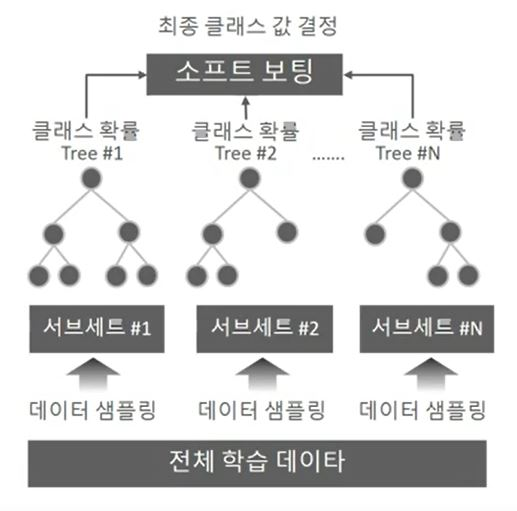